<a href="https://colab.research.google.com/github/ASMT-College/lab-4-clustering-mukeshmukesh00/blob/main/LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **4.1 K-means Clustering**

In [ ]:
import numpy as np
import time
from sklearn.cluster import KMeans

print("\t---- Mukesh ----")
data = np.random.rand(10000, 2) * 100
kmeans = KMeans(n_clusters=5, random_state=42)
start_time = time.time()
kmeans.fit(data)
end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken by K-means to find clusters: {time_taken:.4f} seconds")
print("Cluster Centers:\n", kmeans.cluster_centers_)

	---- Mukesh ----
Time taken by K-means to find clusters: 0.0923 seconds
Cluster Centers:
 [[71.49286491 50.06138218]
 [23.43966707 24.40572071]
 [24.31426684 74.84930579]
 [74.69803137 16.28929298]
 [74.88561034 83.60224799]]


## **4.2 Mini-batch K-means**

In [ ]:
import numpy as np
import time
from sklearn.cluster import MiniBatchKMeans

print("\t---- Mukesh ----")
data = np.random.rand(10000, 2) * 100
batch_sizes = [100, 300, 500, 1000, 1500]
times = []

for batch_size in batch_sizes:
    minibatch_kmeans = MiniBatchKMeans(n_clusters=5, batch_size=batch_size, random_state=42)
    start_time = time.time()
    minibatch_kmeans.fit(data)
    end_time = time.time()
    time_taken = end_time - start_time
    times.append(time_taken)
    print(f"Time taken with batch size {batch_size}: {time_taken:.4f} seconds")

best_batch_size = batch_sizes[np.argmin(times)]
print(f"\nBest batch size: {best_batch_size}")

	---- Mukesh ----
Time taken with batch size 100: 0.0231 seconds
Time taken with batch size 300: 0.0115 seconds
Time taken with batch size 500: 0.0110 seconds
Time taken with batch size 1000: 0.0067 seconds
Time taken with batch size 1500: 0.0171 seconds

Best batch size: 1000


## **4.3 K-means Clustering Algorithm**


	---- Mukesh ----


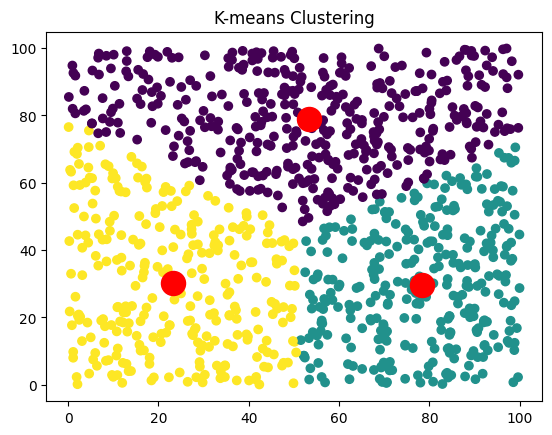

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
print("\t---- Mukesh ----")
data = np.random.rand(1000, 2) * 100
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title("K-means Clustering")
plt.show()


## **4.4 K-means++ Clustering Algorithm**

	---- Mukesh ----


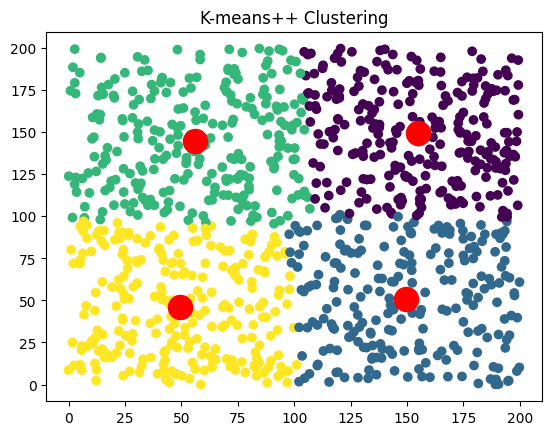

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

print("\t---- Mukesh ----")
data = np.random.rand(1000, 2) * 200
kmeans_plus = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_plus.fit(data)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_plus.labels_, cmap='viridis')
plt.scatter(kmeans_plus.cluster_centers_[:, 0], kmeans_plus.cluster_centers_[:, 1], s=300, c='red')
plt.title("K-means++ Clustering")
plt.show()


## **4.5 Agglomerative Clustering Algorithm**

	---- Mukesh  ----


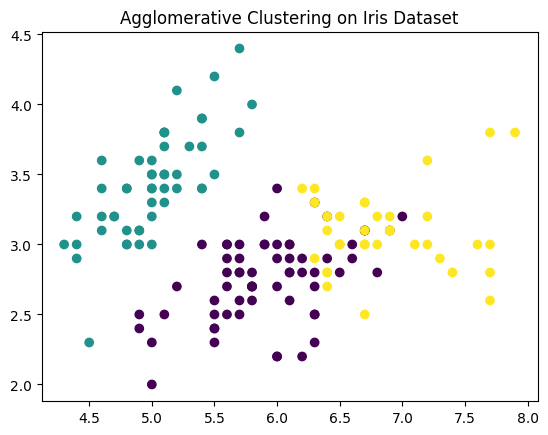

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

print("\t---- Mukesh  ----")
iris = load_iris()
data = iris.data
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering on Iris Dataset")
plt.show()


## **4.6 KMedoids Algorithm**

	---- Mukesh ----


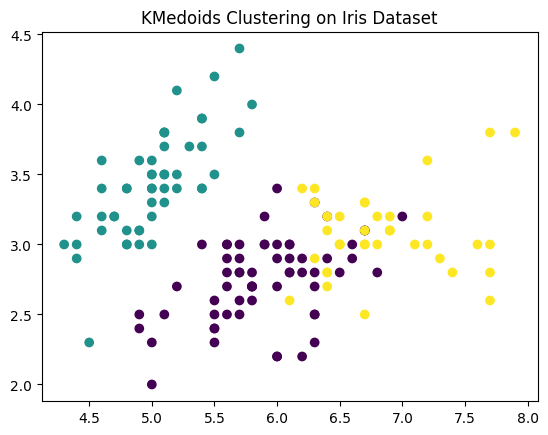

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

print("\t---- Mukesh ----")

class KMedoids:
    def __init__(self, n_clusters=3, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None

    def fit(self, X):
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        medoid_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        medoids = X[medoid_indices].copy()
        distances = pairwise_distances(X)

        for _ in range(100):
            medoid_distances = pairwise_distances(X, medoids)
            labels = np.argmin(medoid_distances, axis=1)

            new_medoids = []
            for k in range(self.n_clusters):
                cluster_points = np.where(labels == k)[0]
                if len(cluster_points) == 0:
                    new_medoids.append(medoids[k])
                    continue

                min_cost = float('inf')
                best_medoid_idx = cluster_points[0]

                for candidate_idx in cluster_points:
                    cost = np.sum(distances[candidate_idx, cluster_points])
                    if cost < min_cost:
                        min_cost = cost
                        best_medoid_idx = candidate_idx

                new_medoids.append(X[best_medoid_idx])

            new_medoids = np.array(new_medoids)

            if np.allclose(medoids, new_medoids):
                break

            medoids = new_medoids
        medoid_distances = pairwise_distances(X, medoids)
        self.labels_ = np.argmin(medoid_distances, axis=1)

        return self

iris = load_iris()
data = iris.data

kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(data)
plt.scatter(data[:, 0], data[:, 1], c=kmedoids.labels_, cmap='viridis')
plt.title("KMedoids Clustering on Iris Dataset")
plt.show()
